# Comparative analysis of various ML models on Loan Status Dataset

RISHABH SINGH BAIS 18BCD7009

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mydatatset/credit_train.csv")

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.shape

(100514, 19)

In [ ]:
for i in df.columns:
  print(len(df[i].unique()))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


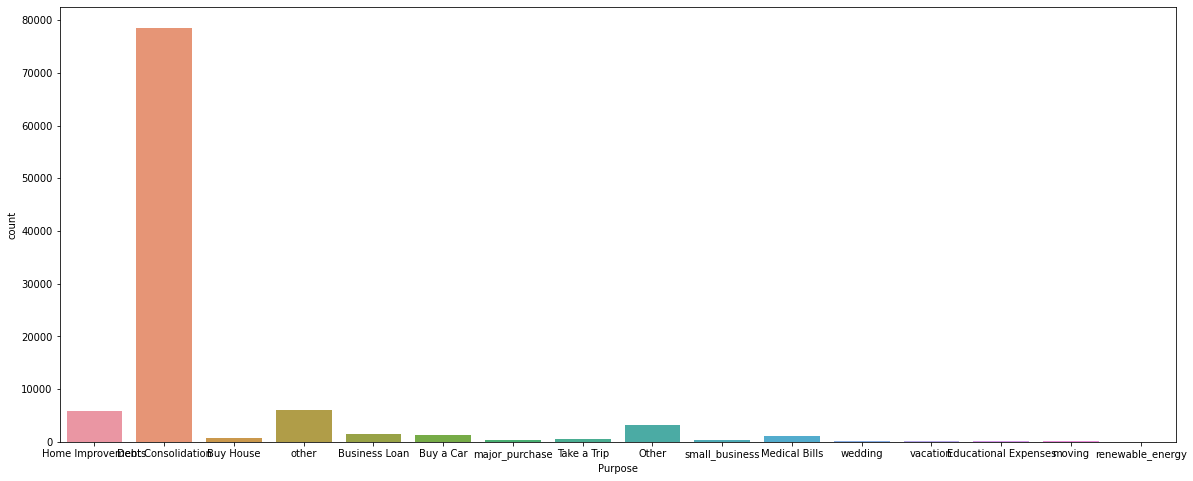

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['Purpose'])

In [ ]:
df.drop(labels=['Loan ID', 'Customer ID', 'Months since last delinquent','Purpose'], axis=1, inplace=True)

In [ ]:
df.loc[df['Loan Status'].isna()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.tail(514).index, inplace=True)

In [ ]:
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
  print(i,"mean",df[i].mean())
  print(i,"median",df[i].median())

Current Loan Amount mean 11760447.38946
Current Loan Amount median 312246.0
Credit Score mean 1076.4560893550702
Credit Score median 724.0
Annual Income mean 1378276.559842169
Annual Income median 1174162.0
Monthly Debt mean 18472.412335799687
Monthly Debt median 16220.3
Years of Credit History mean 18.199140999999393
Years of Credit History median 16.9
Number of Open Accounts mean 11.12853
Number of Open Accounts median 10.0
Number of Credit Problems mean 0.16831
Number of Credit Problems median 0.0
Current Credit Balance mean 294637.38235
Current Credit Balance median 209817.0
Maximum Open Credit mean 760798.381747635
Maximum Open Credit median 467874.0
Bankruptcies mean 0.11774018998757466
Bankruptcies median 0.0
Tax Liens mean 0.029312931293129313
Tax Liens median 0.0


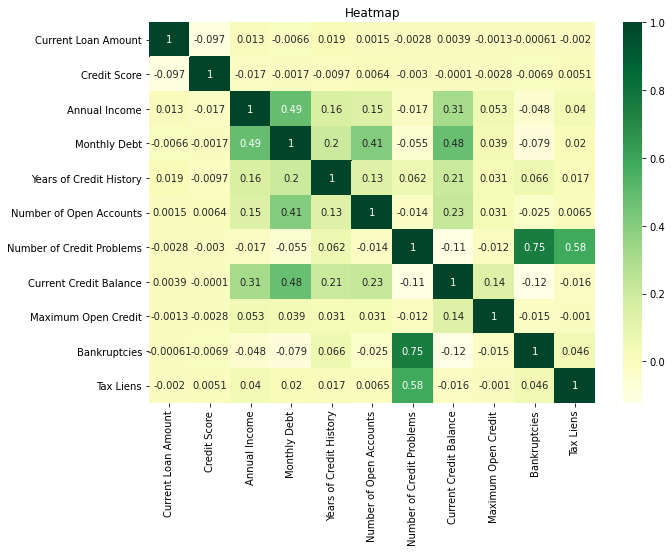

In [ ]:
plt.figure(figsize=(10,7))
hm=df.corr()
plot=sns.heatmap(hm, annot = True, color = 'blue', cmap = 'YlGn')
plot.set(title='Heatmap')
upper = hm.where(np.triu(np.ones(hm.shape), k=1).astype(np.bool))
x = [column for column in upper.columns if any(upper[column] > 0.95)]
df=df.drop(x,axis=1)

OUTLIERS ANALYSIS

In [ ]:
#Removing Outliers Using Z-Score

from scipy import stats
x=['Current Loan Amount','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
  z=np.abs(stats.zscore(df[i]))
  df=df[(z< 3)]


In [ ]:
#Removing Outliers using IQR
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)))]

    



In [ ]:
#Removing Outliers Using Quantiles
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
  removed_outliers = df[i].between(df[i].quantile(.05), df[i].quantile(.95))
  index_names = df[~removed_outliers].index
  df.drop(index_names, inplace=True)


In [ ]:
#Replacing Outliers[Using Quantiles] With NaN and Filling With KNN Imputer
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
  removed_outliers = df[i].between(df[i].quantile(.05), df[i].quantile(.95))
  index_names = df[~removed_outliers].index
  for r in index_names :
    df[i][r]=np.nan

from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
    df[[i]]=imp.fit_transform(df[[i]])


FILLING MISSING VALUES

In [ ]:
#fill with mode
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df.iloc[:,:]=imp.fit_transform(df)


In [ ]:
#Filling with Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
imp = IterativeImputer() 
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
  imp.fit(df[[i]]) 
  df[[i]]=imp.transform(df[[i]])
   
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df.iloc[:,:]=imp.fit_transform(df)

In [ ]:
#filling with knn imputer
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
    df[[i]]=imp.fit_transform(df[[i]])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df.iloc[:,:]=imp.fit_transform(df)    

In [ ]:
#filling with mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
    df[[i]]=imp.fit_transform(df[[i]])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df.iloc[:,:]=imp.fit_transform(df)    

In [ ]:
#filling with median
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
x=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
for i in x:
    df[[i]]=imp.fit_transform(df[[i]])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df.iloc[:,:]=imp.fit_transform(df)

In [ ]:
#filling with interpolate()
df=df.interpolate(method ='linear', limit_direction ='both') 

DATA ENCODING

In [ ]:
df['Loan Status'].replace(("Fully Paid","Charged Off"),(1,0), inplace=True)
df['Loan Status'] = df['Loan Status'].astype('category')

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
catg=['Term', 'Years in current job' ,'Home Ownership']
for x in catg:
  df[x]=labelencoder_Y.fit_transform(df[x])

In [ ]:
catg=['Term', 'Years in current job' ,'Home Ownership']
for x in catg:
  df[x] = df[x].astype('category')


In [ ]:
#one hot encoding
df=pd.get_dummies(df,columns=['Term', 'Years in current job' ,'Home Ownership'],drop_first=True)

SPLITTING DATASET

In [ ]:
X = df.drop(['Loan Status'], axis=1).values
y = df['Loan Status'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
smote_enn=SMOTEENN(random_state=100) 
X_smote_enn,y_smote_enn=smote_enn.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote_enn, y_smote_enn, test_size = 0.2, random_state = 101)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

FEATURE SCALLING

In [ ]:
# standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

APPLYING DATA MINING ALGORITHM

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
llr = LogisticRegression(random_state = 0)
llr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
nnb = GaussianNB()
nnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
ddt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
ddt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
rrf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
rrf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [ ]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9421

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     20338
           1       0.94      0.91      0.93     13950

    accuracy                           0.94     34288
   macro avg       0.94      0.94      0.94     34288
weighted avg       0.94      0.94      0.94     34288


Confusion Matrix: 
 [[19576   762]
 [ 1224 12726]]

ROC AUC: 0.9374

Average Accuracy: 	 0.8470
Accuracy SD: 		 0.0039


In [ ]:
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8538

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      5213
           1       0.83      0.79      0.81      3359

    accuracy                           0.85      8572
   macro avg       0.85      0.84      0.85      8572
weighted avg       0.85      0.85      0.85      8572


Confusion Matrix: 
 [[4660  553]
 [ 700 2659]]

ROC AUC: 0.8428



In [ ]:
print_score(llr, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.7422

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.95      0.81     20338
           1       0.85      0.44      0.58     13950

    accuracy                           0.74     34288
   macro avg       0.78      0.70      0.70     34288
weighted avg       0.77      0.74      0.72     34288


Confusion Matrix: 
 [[19288  1050]
 [ 7789  6161]]

ROC AUC: 0.6950

Average Accuracy: 	 0.7421
Accuracy SD: 		 0.0059


In [ ]:
print_score(llr, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7485

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.95      0.82      5213
           1       0.84      0.44      0.58      3359

    accuracy                           0.75      8572
   macro avg       0.78      0.69      0.70      8572
weighted avg       0.77      0.75      0.73      8572


Confusion Matrix: 
 [[4932  281]
 [1875 1484]]

ROC AUC: 0.6939



In [ ]:
print_score(nnb, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.7376

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.94      0.81     20338
           1       0.84      0.44      0.57     13950

    accuracy                           0.74     34288
   macro avg       0.78      0.69      0.69     34288
weighted avg       0.76      0.74      0.71     34288


Confusion Matrix: 
 [[19218  1120]
 [ 7876  6074]]

ROC AUC: 0.6902

Average Accuracy: 	 0.7371
Accuracy SD: 		 0.0055


In [ ]:
print_score(nnb, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7486

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.95      0.82      5213
           1       0.84      0.44      0.58      3359

    accuracy                           0.75      8572
   macro avg       0.78      0.69      0.70      8572
weighted avg       0.77      0.75      0.73      8572


Confusion Matrix: 
 [[4933  280]
 [1875 1484]]

ROC AUC: 0.6940



In [ ]:
print_score(ddt, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20338
           1       1.00      1.00      1.00     13950

    accuracy                           1.00     34288
   macro avg       1.00      1.00      1.00     34288
weighted avg       1.00      1.00      1.00     34288


Confusion Matrix: 
 [[20338     0]
 [    0 13950]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8727
Accuracy SD: 		 0.0056


In [ ]:
print_score(ddt, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8808

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5213
           1       0.84      0.86      0.85      3359

    accuracy                           0.88      8572
   macro avg       0.87      0.88      0.88      8572
weighted avg       0.88      0.88      0.88      8572


Confusion Matrix: 
 [[4645  568]
 [ 454 2905]]

ROC AUC: 0.8779



In [ ]:
print_score(rrf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20338
           1       1.00      1.00      1.00     13950

    accuracy                           1.00     34288
   macro avg       1.00      1.00      1.00     34288
weighted avg       1.00      1.00      1.00     34288


Confusion Matrix: 
 [[20326    12]
 [    0 13950]]

ROC AUC: 0.9997

Average Accuracy: 	 0.8981
Accuracy SD: 		 0.0068


In [ ]:
print_score(rrf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8996

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      5213
           1       0.84      0.92      0.88      3359

    accuracy                           0.90      8572
   macro avg       0.89      0.90      0.90      8572
weighted avg       0.90      0.90      0.90      8572


Confusion Matrix: 
 [[4625  588]
 [ 273 3086]]

ROC AUC: 0.9030



ENSEMBLE TECHNIQUE

In [ ]:
X = df.drop(['Loan Status'], axis=1)
y = df['Loan Status']

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
ddt = DecisionTreeClassifier(criterion = 'entropy', random_state = 40)
X,y = make_classification(n_samples=100,n_features=15,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
smote_enn=SMOTEENN(random_state=100) 
X_smote_enn,y_smote_enn=smote_enn.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote_enn, y_smote_enn, test_size = 0.2, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf = BaggingClassifier(base_estimator=ddt,n_estimators=10, random_state=0).fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        17

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39


Confusion Matrix: 
 [[22  0]
 [ 0 17]]

ROC AUC: 1.0000

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix: 
 [[6 0]
 [0 4]]

ROC AUC: 1.0000



In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=40)
smote_enn=SMOTEENN(random_state=100) 
X_smote_enn,y_smote_enn=smote_enn.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote_enn, y_smote_enn, test_size = 0.2, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf = GradientBoostingClassifier(random_state=40)
clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       310

    accuracy                           1.00       581
   macro avg       1.00      1.00      1.00       581
weighted avg       1.00      1.00      1.00       581


Confusion Matrix: 
 [[271   0]
 [  0 310]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9363
Accuracy SD: 		 0.0309
Test Result:

accuracy score: 0.9315

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        74
           1       0.93      0.93      0.93        72

    accuracy                           0.93       146
   macro avg       0.93      0.93      0.93       146
weighted avg       0.93      0.93      0.93       146


Confusion Matrix: 
 [[69  5]
 [ 5 67]]

ROC AUC: 0.9315



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20,
                            n_informative=2, n_redundant=0,
                            random_state=40, shuffle=False)
smote_enn=SMOTEENN(random_state=100) 
X_smote_enn,y_smote_enn=smote_enn.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote_enn, y_smote_enn, test_size = 0.2, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf = AdaBoostClassifier(n_estimators=100, random_state=40)
clf.fit(X_train, y_train)
#AdaBoostClassifier(n_estimators=100, random_state=40)


#clf.score(X, y)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=40)

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       182

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388


Confusion Matrix: 
 [[206   0]
 [  0 182]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9948
Accuracy SD: 		 0.0104
Test Result:

accuracy score: 0.9897

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.97      0.99        40

    accuracy                           0.99        97
   macro avg       0.99      0.99      0.99        97
weighted avg       0.99      0.99      0.99        97


Confusion Matrix: 
 [[57  0]
 [ 1 39]]

ROC AUC: 0.9875



In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

'''X = df.drop(['Loan Status'], axis=1)
Y = df['Loan Status']'''
smote_enn=SMOTEENN(random_state=100) 
X_smote_enn,y_smote_enn=smote_enn.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote_enn, y_smote_enn, test_size = 0.2, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
'''# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))'''

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

'# make predictions for test data\ny_pred = model.predict(X_test)\npredictions = [round(value) for value in y_pred]\n# evaluate predictions\naccuracy = accuracy_score(y_test, predictions)\nprint("Accuracy: %.2f%%" % (accuracy * 100.0))'

In [ ]:
print_score(model, X_train, X_test, y_train, y_test, train=True)
print_score(model, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9974

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      0.99      1.00       182

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388


Confusion Matrix: 
 [[206   0]
 [  1 181]]

ROC AUC: 0.9973

Average Accuracy: 	 0.9948
Accuracy SD: 		 0.0104
Test Result:

accuracy score: 0.9897

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.97      0.99        40

    accuracy                           0.99        97
   macro avg       0.99      0.99      0.99        97
weighted avg       0.99      0.99      0.99        97


Confusion Matrix: 
 [[57  0]
 [ 1 39]]

ROC AUC: 0.9875



THE END